In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

print("훈련 세트 점수: {: .3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수:  1.000
테스트 세트 점수:  0.958


In [ ]:
#learning_rate = 0.1이며 깊이가 3인 트리 100개 
#훈련세트가 100 이기에 과대적합임으로 트리의 최디깊이를 줄여 사전 가지치기 학습을 낮추자ㅠ

In [7]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

print("훈련 세트 점수: {: .3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수:  0.995
테스트 세트 점수:  0.965


In [8]:
#max_depth=1트리 최대 깊이는 낮춤 과적합을 피하고 테스트 데이터 성능 향상이 됐다.

In [9]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("훈련 세트 점수: {: .3f}".format(gbrt.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(gbrt.score(X_test,y_test)))

훈련 세트 점수:  0.995
테스트 세트 점수:  0.944


In [ ]:
#학습률을 낮추게 되면 테스트데이터싀 성능이 떨어진다.

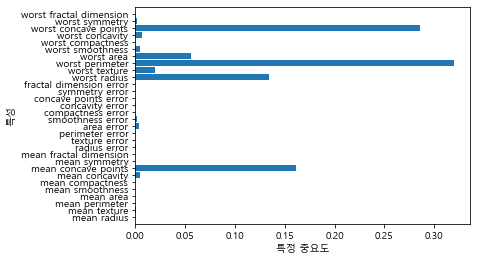

In [15]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특정 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)

plot_feature_importances_cancer(gbrt)

In [ ]:
#처음에 선택이 되지 않는 애들은 랜덤포레스트와 다르게 계혹 선택이 되지 않는다.

In [ ]:
#랜덤 포레스트에서 더 성능을 쥐어짜야 할때 사뇽(대규모일 때)
#특성 스케일 조정이 필요가 없다.
#하지만 고차원 데이터에 잘 작동하지 않는다.

In [ ]:
#앙상블
#여러개의 모델이 투표를 한다
#배깅 : 훈련 샘플을 여러 번 사용하여 훈련이다
#편향은 비슷, 분산은 감소한다.

In [22]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(
DecisionTreeClassifier(),n_estimators=500,bootstrap=True,oob_score=True,
random_state=40)
bag_clf.fit(X_train,y_train)

#obb-score 출력
print("obb_score",bag_clf.oob_score_)



obb_score 0.9530516431924883


In [ ]:
#XGBoost는 
#그래디언드 부스팅을 최적화 시켯으며
#빠른 속도, 확장성, 이식성이 강하다